# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
from __future__ import absolute_import, division, print_function

In [3]:
import tensorflow as tf
import numpy as np
rng = np.random

In [4]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [5]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]

In [7]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
print(W)
print(b)
# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

<tf.Variable 'weight:0' shape=() dtype=float32, numpy=0.58349824>
<tf.Variable 'bias:0' shape=() dtype=float32, numpy=0.63141656>


## Class GradientTape
Record operations for automatic differentiation.

[GradientTape](https://tensorflow.google.cn/versions/r2.0/api_docs/python/tf/GradientTape)

In [7]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [8]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.250252, W: 0.015604, b: 2.472152
step: 100, loss: 0.230429, W: 0.029512, b: 2.373556
step: 150, loss: 0.212873, W: 0.042599, b: 2.280770
step: 200, loss: 0.197325, W: 0.054916, b: 2.193450
step: 250, loss: 0.183555, W: 0.066507, b: 2.111276
step: 300, loss: 0.171361, W: 0.077415, b: 2.033944
step: 350, loss: 0.160560, W: 0.087680, b: 1.961168
step: 400, loss: 0.150995, W: 0.097340, b: 1.892680
step: 450, loss: 0.142524, W: 0.106432, b: 1.828227
step: 500, loss: 0.135022, W: 0.114987, b: 1.767573
step: 550, loss: 0.128378, W: 0.123039, b: 1.710492
step: 600, loss: 0.122494, W: 0.130616, b: 1.656774
step: 650, loss: 0.117282, W: 0.137746, b: 1.606221
step: 700, loss: 0.112667, W: 0.144457, b: 1.558647
step: 750, loss: 0.108580, W: 0.150772, b: 1.513876
step: 800, loss: 0.104960, W: 0.156715, b: 1.471743
step: 850, loss: 0.101754, W: 0.162307, b: 1.432093
step: 900, loss: 0.098915, W: 0.167571, b: 1.394778
step: 950, loss: 0.096400, W: 0.172524, b: 1.359662
step: 1000, l

In [9]:
import matplotlib.pyplot as plt

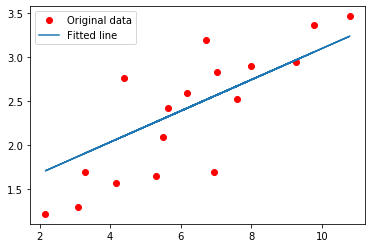

In [10]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()